# Results and Graphics

---------------------------------------

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

In [2]:
path_raw='../Datos/Raw/'
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

Reading the data with the Ne line ratios and the results from CIGALE:

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
print('Total number of galaxies with Ne ratios data: ',len(Ne_Sy))

Total number of galaxies with Ne ratios data:  95


## Preparing the data:

### Converting the luminosities from Watts (W) to Solar Luminosities ($L_{\odot}$)

In [4]:
#for cigpar in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.dust_luminosity',\
#             'bayes.agn.accretion_power']:
for cigpar in ['bayes.agn.disk_luminosity']:
    Ne_Sy[cigpar] = (Ne_Sy[cigpar]*u.W).to(u.solLum)
    Ne_Sy[cigpar+'_err'] = (Ne_Sy[cigpar+'_err']*u.W).to(u.solLum)

### Logaritmic values and Error Propagation for the Graphics

In the next cell we calculate the logaritmic values for the Ne ratios, the star formation rate and the mass star with their error propagation

In [5]:
log_NeVNeII_Sy = np.log10(Ne_Sy['[NeV]/[NeII]'])
log_NeVNeIII_Sy = np.log10(Ne_Sy['[NeV]/[NeIII]'])
log_NeIIINeII_Sy = np.log10(Ne_Sy['[NeIII]/[NeII]'])
log_sfr_Sy = np.log10(Ne_Sy['bayes.sfh.sfr'])
log_m_star_Sy = np.log10(Ne_Sy['bayes.stellar.m_star'])
log_l_diskAGN = np.log10(Ne_Sy['bayes.agn.disk_luminosity'])

log_NeVNeII_Sy_err = Ne_Sy['[NeV]/[NeII]_err']/(Ne_Sy['[NeV]/[NeII]']*np.log(10))
log_NeVNeIII_Sy_err = Ne_Sy['[NeV]/[NeIII]_err']/(Ne_Sy['[NeV]/[NeIII]']*np.log(10))
log_NeIIINeII_Sy_err = Ne_Sy['[NeIII]/[NeII]_err']/(Ne_Sy['[NeIII]/[NeII]']*np.log(10))
log_sfr_Sy_err = Ne_Sy['bayes.sfh.sfr_err']/(Ne_Sy['bayes.sfh.sfr']*np.log(10))
log_m_star_Sy_err = Ne_Sy['bayes.stellar.m_star_err']/(Ne_Sy['bayes.stellar.m_star']*np.log(10))
log_l_diskAGN_err = Ne_Sy['bayes.agn.disk_luminosity_err']/(Ne_Sy['bayes.agn.disk_luminosity']*np.log(10))

#Adding the new values to the table
Ne_Sy['log_[NeV]/[NeII]'] = log_NeVNeII_Sy
Ne_Sy['log_[NeV]/[NeII]_err'] = log_NeVNeII_Sy_err

Ne_Sy['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy
Ne_Sy['log_[NeV]/[NeIII]_err'] = log_NeVNeIII_Sy_err

Ne_Sy['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy
Ne_Sy['log_[NeIII]/[NeII]_err'] = log_NeIIINeII_Sy_err

Ne_Sy['log_bayes.sfh.sfr'] = log_sfr_Sy
Ne_Sy['log_bayes.sfh.sfr_err'] = log_sfr_Sy_err

Ne_Sy['log_bayes.stellar.m_star'] = log_m_star_Sy
Ne_Sy['log_bayes.stellar.m_star_err'] = log_m_star_Sy_err

Ne_Sy['log_bayes.agn.disk_luminosity'] = log_l_diskAGN
Ne_Sy['log_bayes.agn.disk_luminosity_err'] = log_l_diskAGN_err

In [6]:
#Ne_Sy['Main_id','otype','bayes.agn.i','[NeV]/[NeII]','bayes.agn.fracAGN','bayes.agn.disk_luminosity']

### Separating the sample according the Ne ratio info

In [7]:
NeVNeII_Sy = Table(Ne_Sy)
NeVNeII_Sy.remove_rows(np.where(np.isnan(NeVNeII_Sy['[NeV]/[NeII]']))[0])
NeVNeIII_Sy = Table(Ne_Sy)
NeVNeIII_Sy.remove_rows(np.where(np.isnan(NeVNeIII_Sy['[NeV]/[NeIII]']))[0])
NeIIINeII_Sy = Table(Ne_Sy)
NeIIINeII_Sy.remove_rows(np.where(np.isnan(NeIIINeII_Sy['[NeIII]/[NeII]']))[0])

print('From the', len(Ne_Sy),'galaxies of the sample:')
print(len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info,')
print(len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 95 galaxies of the sample:
82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info,
83 galaxies have [NeIII]/[NeII] info


### Separating the groups in Sy1 and Sy2  (according their classification in SIMBAD)

In [8]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

NeVNeII_Sy1 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy1']
NeVNeII_Sy2 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy2']
NeVNeII_SyG = NeVNeII_Sy[NeVNeII_Sy['otype']=='SyG']

NeVNeIII_Sy1 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy1']
NeVNeIII_Sy2 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy2']
NeVNeIII_SyG = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='SyG']

NeIIINeII_Sy1 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy1']
NeIIINeII_Sy2 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy2']
NeIIINeII_SyG = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='SyG']

In [9]:
print('From the', len(Ne_Sy),'galaxies:')
print(len(Ne_Sy1),'galaxies are Seyfert 1,')
print(len(Ne_Sy2),'galaxies are Seyfert 2,')
print(len(Ne_SyG),'galaxies are Seyfert without classification')

From the 95 galaxies:
48 galaxies are Seyfert 1,
47 galaxies are Seyfert 2,
0 galaxies are Seyfert without classification


### Converting tables to pandas to compute the correlations coeficients

For computing the pearson's correlation coeficiens, we will use the function corr from Pandas, so we need to convert the tables to pandas

In [10]:
df_Ne_Sy = Ne_Sy.to_pandas()
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()
df_NeVNeII_Sy = NeVNeII_Sy.to_pandas()
df_NeVNeII_Sy1 = NeVNeII_Sy1.to_pandas()
df_NeVNeII_Sy2 = NeVNeII_Sy2.to_pandas()
df_NeVNeIII_Sy = NeVNeIII_Sy.to_pandas()
df_NeVNeIII_Sy1 = NeVNeIII_Sy1.to_pandas()
df_NeVNeIII_Sy2 = NeVNeIII_Sy2.to_pandas()
df_NeIIINeII_Sy = NeIIINeII_Sy.to_pandas()
df_NeIIINeII_Sy1 = NeIIINeII_Sy1.to_pandas()
df_NeIIINeII_Sy2 = NeIIINeII_Sy2.to_pandas()

### Bootstraping function for the correlation coefficients

With the next function we compute the correlation coefficient with bootstrapping:

In [11]:
def BootstrapCorr(n,fract,df,var1,var2,histo=False,conf=90):
    '''
    This functions do the bootstraping for the correlation coefficients
    Inputs:
    n: Number of samples
    fract: Fraction of data from the intial 
           dataframe to make the samples
    df: Dataframe
    var1, var2: Variables to be correlated
    histo: If you want to print the histogram
    conf: Confidence Interval
    '''
    corr_bootstrap = []
    for i in range(n):
        sample = df.sample(frac=fract,replace=True)
        corr = sample[var1].corr(sample[var2])
        corr_bootstrap.append(corr)
     
    mu, std = norm.fit(corr_bootstrap)# mean and standard deviation
    med = np.median(corr_bootstrap) #median
    
    #Percentiles:
    per1=np.percentile(corr_bootstrap,(100-conf)/2)
    per2=np.percentile(corr_bootstrap,100-((100-conf)/2))
    
    print('Bootstraps results for the correlation coefficient between',var1,'y',var2,':')
    print('Samples lenght:',len(sample),'of',len(df))
    print('Number of samples:',n)
    print('Median:',np.median(corr_bootstrap))
    print('Mean:',mu)
    print('Variance:',np.var(corr_bootstrap))
    print('Standard Desviation:',std)
    print(conf,'% confidence interval:',np.percentile(corr_bootstrap,5),'-',np.percentile(corr_bootstrap,95))
    
    if histo == True:
        bins = np.linspace(min(corr_bootstrap), max(corr_bootstrap),50)
        plt.figure(figsize=(8,5))
        plt.hist(corr_bootstrap, bins=bins, density=True, histtype='step')
        plt.axvline(x=mu,ls='--',color='gray')
        plt.axvline(x=med,ls='--',color='blue')
        plt.axvline(x=per1,ls='--',color='yellow')
        plt.axvline(x=per2,ls='--',color='yellow')
        plt.xlabel(r'Correlation Coefficient',fontsize=14)
        plt.ylabel('Density',fontsize=14)
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=0.5)
    
    return corr_bootstrap,mu,std,med,per1,per2

----------------------------------------

# [NeV]/[NeII]

In [12]:
print('From the', len(NeVNeII_Sy),'galaxies with [NeV]/[NeII] info:')
print(len(NeVNeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeII_Sy2),'galaxies are Seyfert 2,')

From the 82 galaxies with [NeV]/[NeII] info:
42 galaxies are Seyfert 1,
40 galaxies are Seyfert 2,


## Histogram

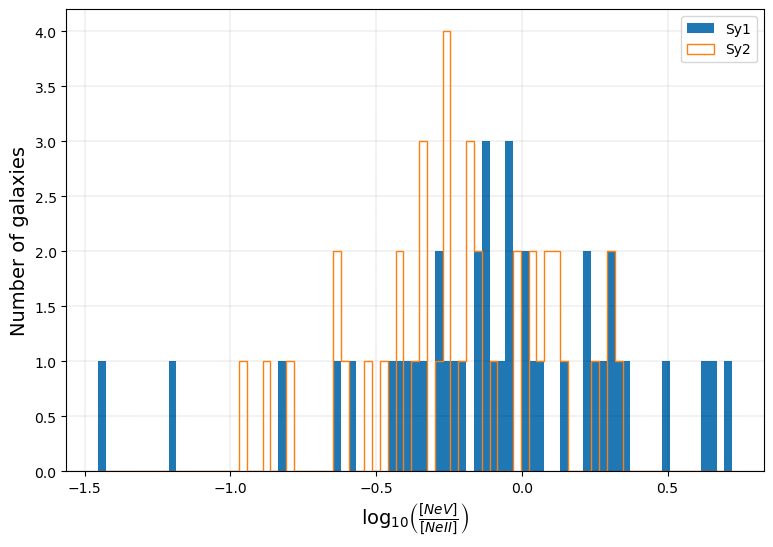

In [13]:
bins_NeVNeII_Sy = np.linspace(min(NeVNeII_Sy['log_[NeV]/[NeII]']),max(NeVNeII_Sy['log_[NeV]/[NeII]']),len(NeVNeII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeVNeII_Sy1['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, label='Sy1')
plt.hist(NeVNeII_Sy2['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeII_SyG['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

## [NeV]/[NeII] vs AGN Fraction

### Correlation Coefficients:

In [14]:
NeVNeII_corr_fracAGN_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
Total Sample:  0.5117530389435667
Seyfert 1:  0.6576009304823218
Seyfert 2:  0.29270448964694584


In [15]:
NeVNeII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeVNeII_Sy,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 66 of 82
Number of samples: 10000
Median: 0.512046754162129
Mean: 0.5069678660622584
Variance: 0.008791039761491622
Standard Desviation: 0.0937605448015935
90 % confidence interval: 0.34506589148176736 - 0.6511218182542067


In [16]:
NeVNeII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 42
Number of samples: 10000
Median: 0.6581996563737614
Mean: 0.6437951925769596
Variance: 0.0126564444207602
Standard Desviation: 0.11250086408894912
90 % confidence interval: 0.43551485189616 - 0.7998432339283439


In [17]:
NeVNeII_fracAGN_Sy2 = BootstrapCorr(10000,0.8,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 32 of 40
Number of samples: 10000
Median: 0.30262568670392764
Mean: 0.29666430337737193
Variance: 0.021558237989216238
Standard Desviation: 0.1468272385806402
90 % confidence interval: 0.050526794905074404 - 0.5291912973471644


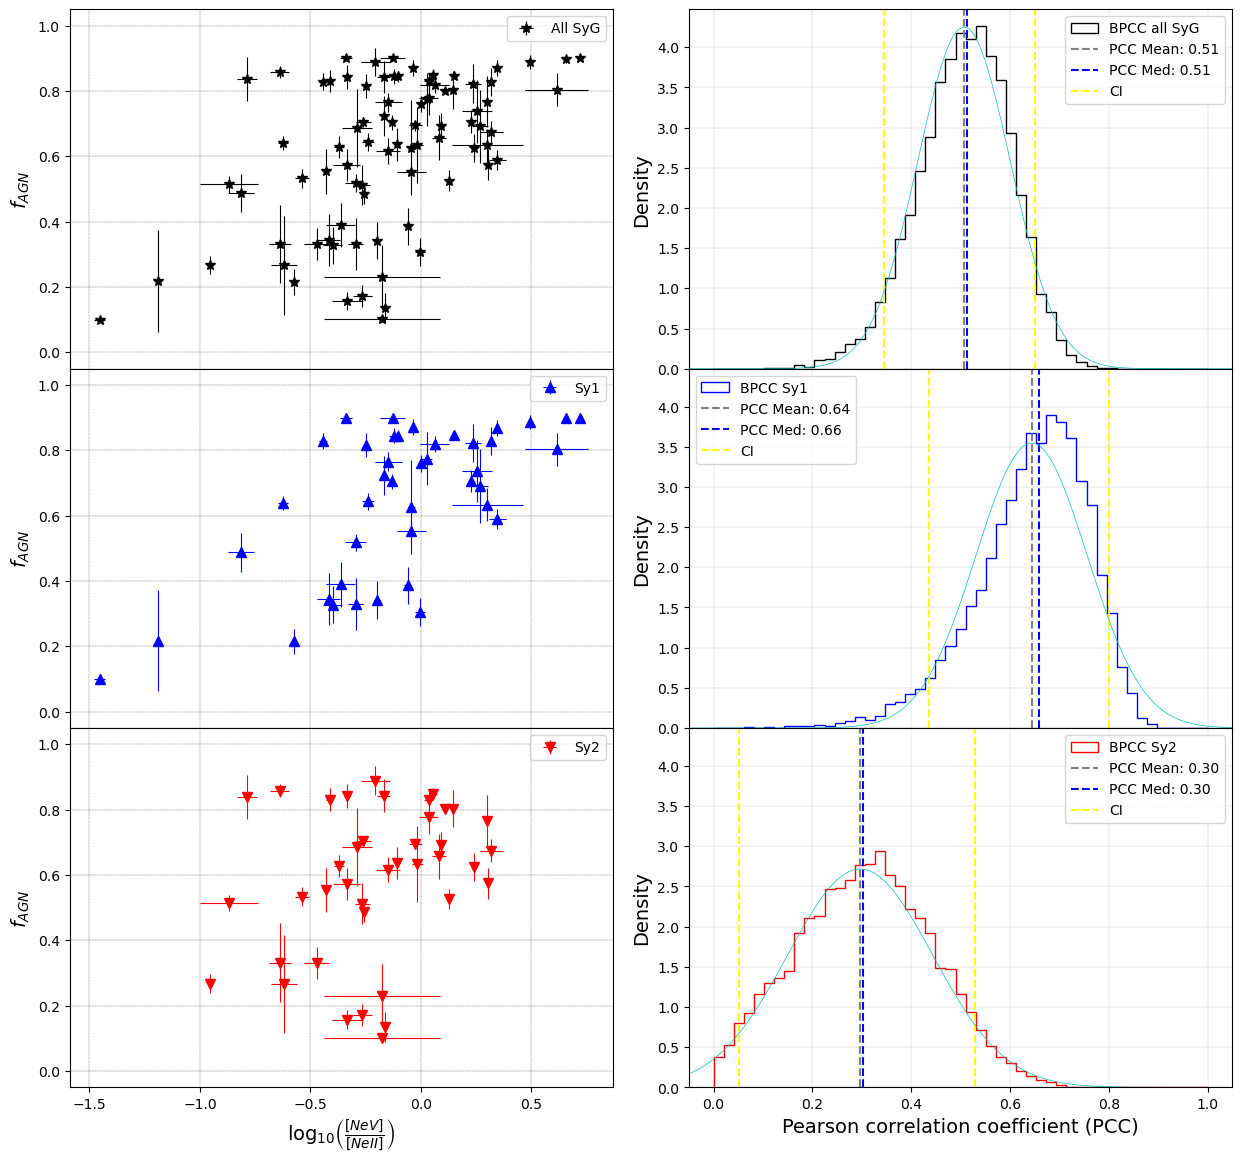

In [18]:
plt.figure(figsize=(15,14))
#plt.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1 = plt.subplot(321)
ax1.errorbar(NeVNeII_Sy['log_[NeV]/[NeII]'], NeVNeII_Sy['bayes.agn.fracAGN'],NeVNeII_Sy['bayes.agn.fracAGN_err'], NeVNeII_Sy['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All SyG')
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_ylim(-0.05,1.05)
ax1.legend()
ax1.grid(color='k', linestyle='--', linewidth=0.2)

ax2 = plt.subplot(323,sharex=ax1,sharey=ax1)
ax2.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['bayes.agn.fracAGN'],NeVNeII_Sy1['bayes.agn.fracAGN_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='b^',label='Sy1')
ax2.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax2.legend()
ax2.grid(color='k', linestyle='--', linewidth=0.2)

ax3 = plt.subplot(325,sharex=ax1,sharey=ax1)
ax3.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],NeVNeII_Sy2['bayes.agn.fracAGN_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='rv',label='Sy2')
ax3.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax3.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax3.legend()
ax3.grid(color='k', linestyle='--', linewidth=0.2)

bins = np.linspace(0,1,50)

ax4 = plt.subplot(322)
ax4.hist(NeVNeII_fracAGN_Sy[0],bins=bins,density=True,color='k',histtype='step',label='BPCC all SyG')
ax4.axvline(x=NeVNeII_fracAGN_Sy[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeII_fracAGN_Sy[1])
ax4.axvline(x=NeVNeII_fracAGN_Sy[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeII_fracAGN_Sy[3])
ax4.axvline(x=NeVNeII_fracAGN_Sy[4],ls='--',color='yellow',label='CI')
ax4.axvline(x=NeVNeII_fracAGN_Sy[5],ls='--',color='yellow')
ax4.set_ylabel('Density',fontsize=14)
ax4.legend()
ax4.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax4.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeII_fracAGN_Sy[1], NeVNeII_fracAGN_Sy[2])
ax4.plot(x, p, 'c', linewidth=0.5)

ax5 = plt.subplot(324,sharex=ax4,sharey=ax4)
ax5.hist(NeVNeII_fracAGN_Sy1[0],bins=bins,density=True,color='b',histtype='step',label='BPCC Sy1')
ax5.axvline(x=NeVNeII_fracAGN_Sy1[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeII_fracAGN_Sy1[1])
ax5.axvline(x=NeVNeII_fracAGN_Sy1[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeII_fracAGN_Sy1[3])
ax5.axvline(x=NeVNeII_fracAGN_Sy1[4],ls='--',color='yellow',label='CI')
ax5.axvline(x=NeVNeII_fracAGN_Sy1[5],ls='--',color='yellow')
ax5.set_ylabel('Density',fontsize=14)
ax5.legend()
ax5.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax5.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeII_fracAGN_Sy1[1], NeVNeII_fracAGN_Sy1[2])
ax5.plot(x, p, 'c', linewidth=0.5)

ax6 = plt.subplot(326,sharex=ax4,sharey=ax4)
ax6.hist(NeVNeII_fracAGN_Sy2[0],bins=bins,density=True,color='r',histtype='step',label='BPCC Sy2')
ax6.axvline(x=NeVNeII_fracAGN_Sy2[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeII_fracAGN_Sy2[1])
ax6.axvline(x=NeVNeII_fracAGN_Sy2[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeII_fracAGN_Sy2[3])
ax6.axvline(x=NeVNeII_fracAGN_Sy2[4],ls='--',color='yellow',label='CI')
ax6.axvline(x=NeVNeII_fracAGN_Sy2[5],ls='--',color='yellow')
ax6.set_xlabel(r'Pearson correlation coefficient (PCC)',fontsize=14)
ax6.set_ylabel('Density',fontsize=14)
ax6.legend()
ax6.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax6.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeII_fracAGN_Sy2[1], NeVNeII_fracAGN_Sy2[2])
ax6.plot(x, p, 'c', linewidth=0.5)

plt.subplots_adjust(hspace=0.0,wspace=0.14) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## [NeV]/[NeII] vs other variables (outputs from CIGALE)

### SFR

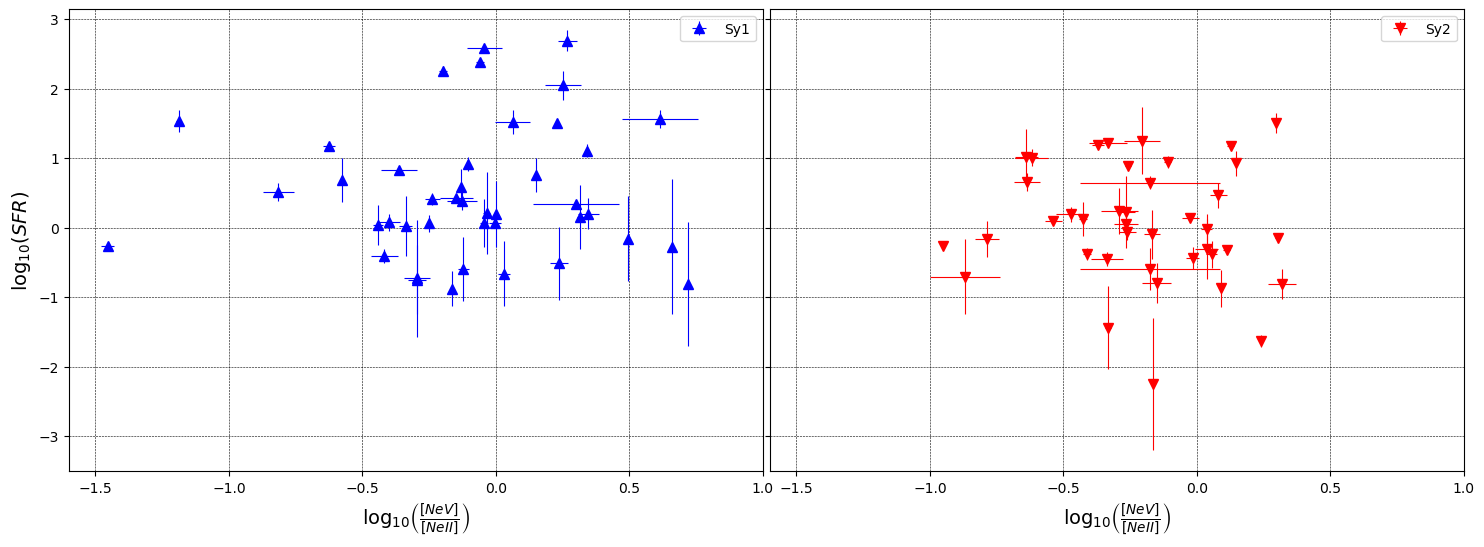

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$SFR$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
#ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.sfh.sfr'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.sfh.sfr'],\
             NeVNeII_Sy1['log_bayes.sfh.sfr_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],markersize=7,elinewidth=0.8,fmt='b^',label='Sy1')
ax1.set_xlim(-1.6,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(SFR)$', fontsize=14)
ax1.legend()
ax1.grid(color='k', linestyle='--', linewidth=0.4)

#ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],\
             NeVNeII_Sy2['log_bayes.sfh.sfr_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],markersize=7,elinewidth=0.8,fmt='rv',label='Sy2')
ax2.set_xlim(-1.6,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.legend()
ax2.grid(color='k', linestyle='--', linewidth=0.4)

plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')

**Correlation:**

In [20]:
NeVNeII_corr_SFR_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.sfh.sfr'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeII_corr_SFR_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:
Total Sample:  0.032358634951446724
Seyfert 1:  0.039911514993654175
Seyfert 2:  -0.08220104651402141


In [21]:
NeVNeII_SFR_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.sfh.sfr')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.03293482337398285
Mean: 0.03082883531182693
Variance: 0.011565555954532137
Standard Desviation: 0.1075432747991809
90 % confidence interval: -0.14988616683646244 - 0.20266898032501304


In [22]:
NeVNeII_SFR_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.sfh.sfr')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.04167497636199213
Mean: 0.03960934446117623
Variance: 0.02130747513048096
Standard Desviation: 0.14597080232183748
90 % confidence interval: -0.20524535385362974 - 0.27716446904551717


In [23]:
NeVNeII_SFR_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.sfh.sfr')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 40 of 40
Number of samples: 10000
Median: -0.08433659422321813
Mean: -0.08593443473052412
Variance: 0.02362191675747357
Standard Desviation: 0.15369423137344346
90 % confidence interval: -0.33591797506440163 - 0.16333455960165857


### Star Mass

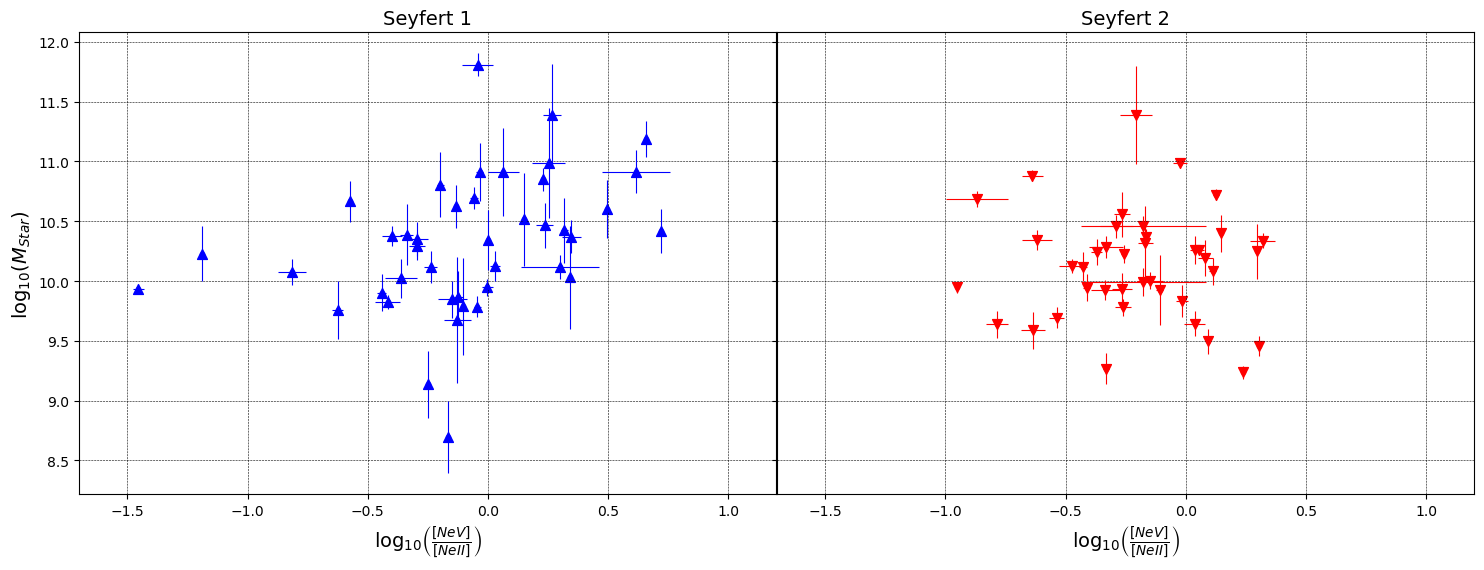

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$M_{star}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.stellar.m_star'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.stellar.m_star'],\
             NeVNeII_Sy1['log_bayes.stellar.m_star_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.7,1.2)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(M_{Star})$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],\
             NeVNeII_Sy2['log_bayes.stellar.m_star_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.7,1.2)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.001) #Space between subplots

**Correlation:**

In [25]:
NeVNeII_corr_m_star_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeVNeII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Mass:
Total Sample:  0.23862348785855922
Seyfert 1:  0.36543437601265155
Seyfert 2:  -0.051934160313952725


In [26]:
NeVNeII_m_star_Sy = BootstrapCorr(10000,0.7,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.stellar.m_star')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 57 of 82
Number of samples: 10000
Median: 0.24025409599464195
Mean: 0.23872451080614365
Variance: 0.01159344407520216
Standard Desviation: 0.10767285672444174
90 % confidence interval: 0.05900784753351298 - 0.4126801286421791


In [27]:
NeVNeII_m_star_Sy1 = BootstrapCorr(10000,0.7,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.stellar.m_star')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 29 of 42
Number of samples: 10000
Median: 0.3773635252127308
Mean: 0.3766840376482526
Variance: 0.010930206592047092
Standard Desviation: 0.10454762834252669
90 % confidence interval: 0.20495782852484015 - 0.5494673203484582


In [28]:
NeVNeII_m_star_Sy2 = BootstrapCorr(10000,0.7,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.stellar.m_star')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 28 of 40
Number of samples: 10000
Median: -0.04535671592721398
Mean: -0.043913517467313076
Variance: 0.04037617478546895
Standard Desviation: 0.20093823624554125
90 % confidence interval: -0.37024251326025315 - 0.2904262368166517


## Correlations Matrix

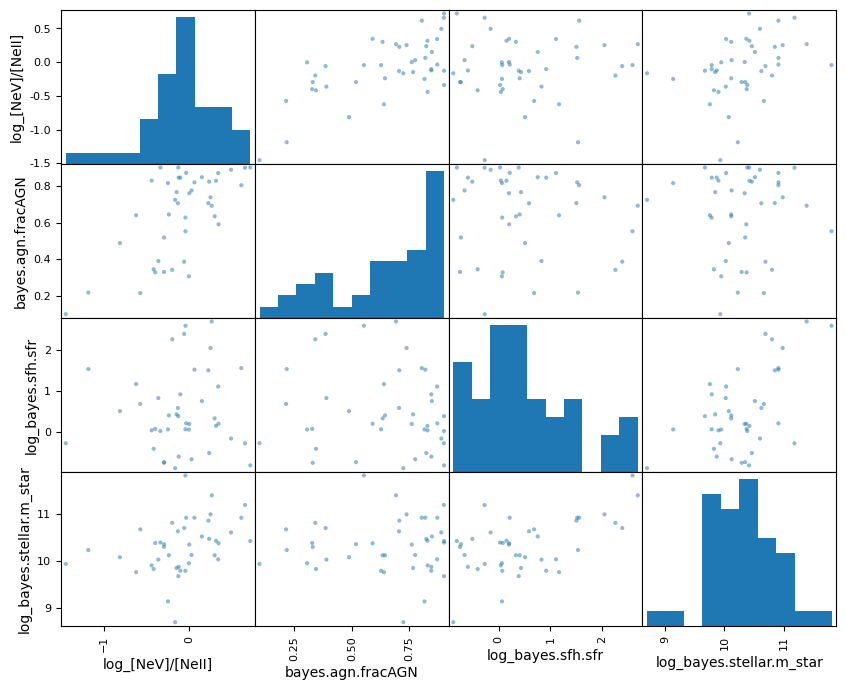

In [29]:
attributes=['log_[NeV]/[NeII]','bayes.agn.fracAGN','log_bayes.sfh.sfr','log_bayes.stellar.m_star']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_NeVNeII_Sy1[attributes], figsize=(10,8))

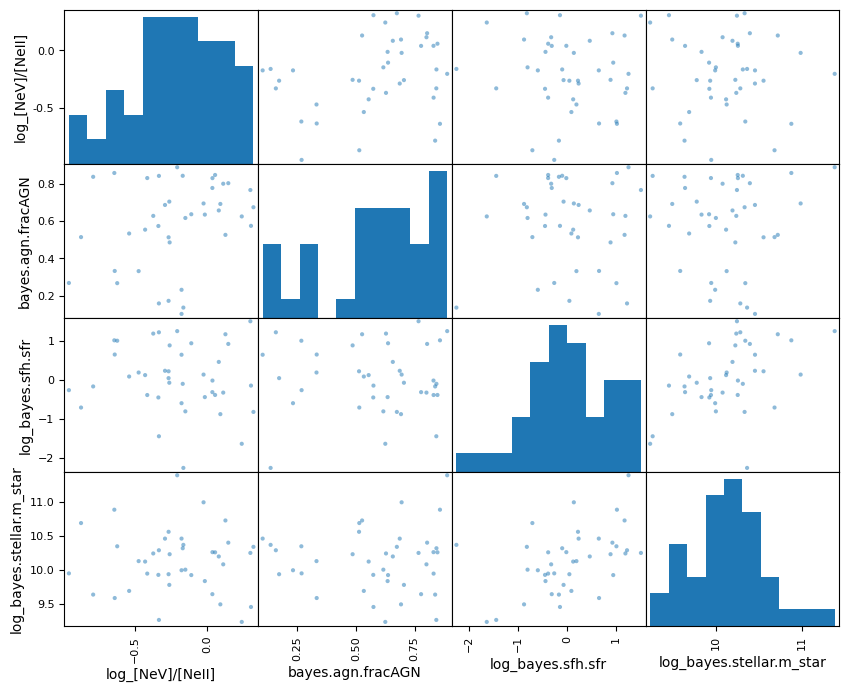

In [30]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_NeVNeII_Sy2[attributes], figsize=(10,8))

--------------------------------------

# [NeV]/[NeIII]

In [31]:
print('From the', len(NeVNeIII_Sy),'galaxies with [NeV]/[NeIII] info:')
print(len(NeVNeIII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeIII_Sy2),'galaxies are Seyfert 2,')

From the 80 galaxies with [NeV]/[NeIII] info:
36 galaxies are Seyfert 1,
44 galaxies are Seyfert 2,


## Histogram

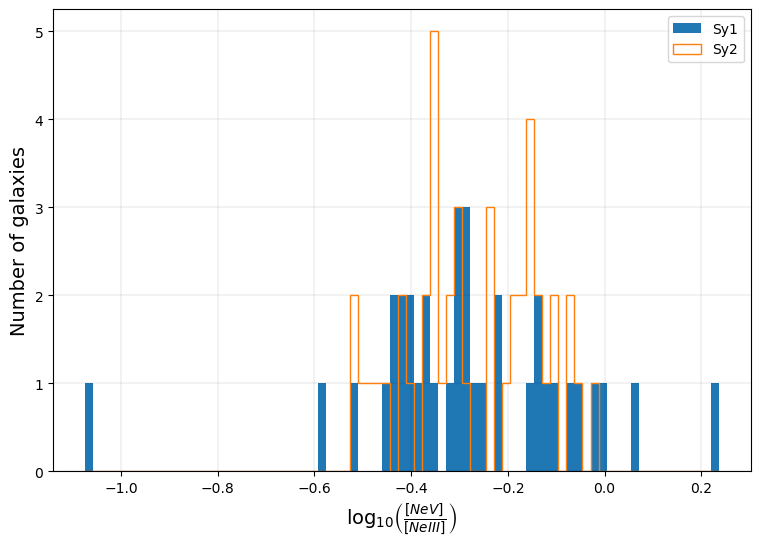

In [32]:
bins_NeVNeIII_Sy = np.linspace(min(NeVNeIII_Sy['log_[NeV]/[NeIII]']),max(NeVNeIII_Sy['log_[NeV]/[NeIII]']),len(NeVNeIII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, label='Sy1')
plt.hist(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeIII_SyG['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

## [NeV]/[NeIII] vs AGN Fraction

### Correlation Coefficients:

In [33]:
NeVNeIII_corr_fracAGN_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeIII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeIII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:
Total Sample:  0.327751465534536
Seyfert 1:  0.5098878980360981
Seyfert 2:  0.1121293293937291


In [34]:
NeVNeIII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeVNeIII_Sy,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 64 of 80
Number of samples: 10000
Median: 0.3232318583895632
Mean: 0.31570975721562033
Variance: 0.01735051375587743
Standard Desviation: 0.13172134889939988
90 % confidence interval: 0.0854097491765701 - 0.5185063896192731


In [35]:
NeVNeIII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeVNeIII_Sy1,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 29 of 36
Number of samples: 10000
Median: 0.5005191320261215
Mean: 0.4764605442184086
Variance: 0.027454070402591624
Standard Desviation: 0.16569269870030973
90 % confidence interval: 0.17234932694781208 - 0.7078763538049542


In [36]:
NeVNeIII_fracAGN_Sy2 = BootstrapCorr(10000,1,df_NeVNeIII_Sy2,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 44 of 44
Number of samples: 10000
Median: 0.11604485160775659
Mean: 0.11564725325170758
Variance: 0.02208074869153749
Standard Desviation: 0.14859592420903572
90 % confidence interval: -0.12600461460828086 - 0.3615472710487742


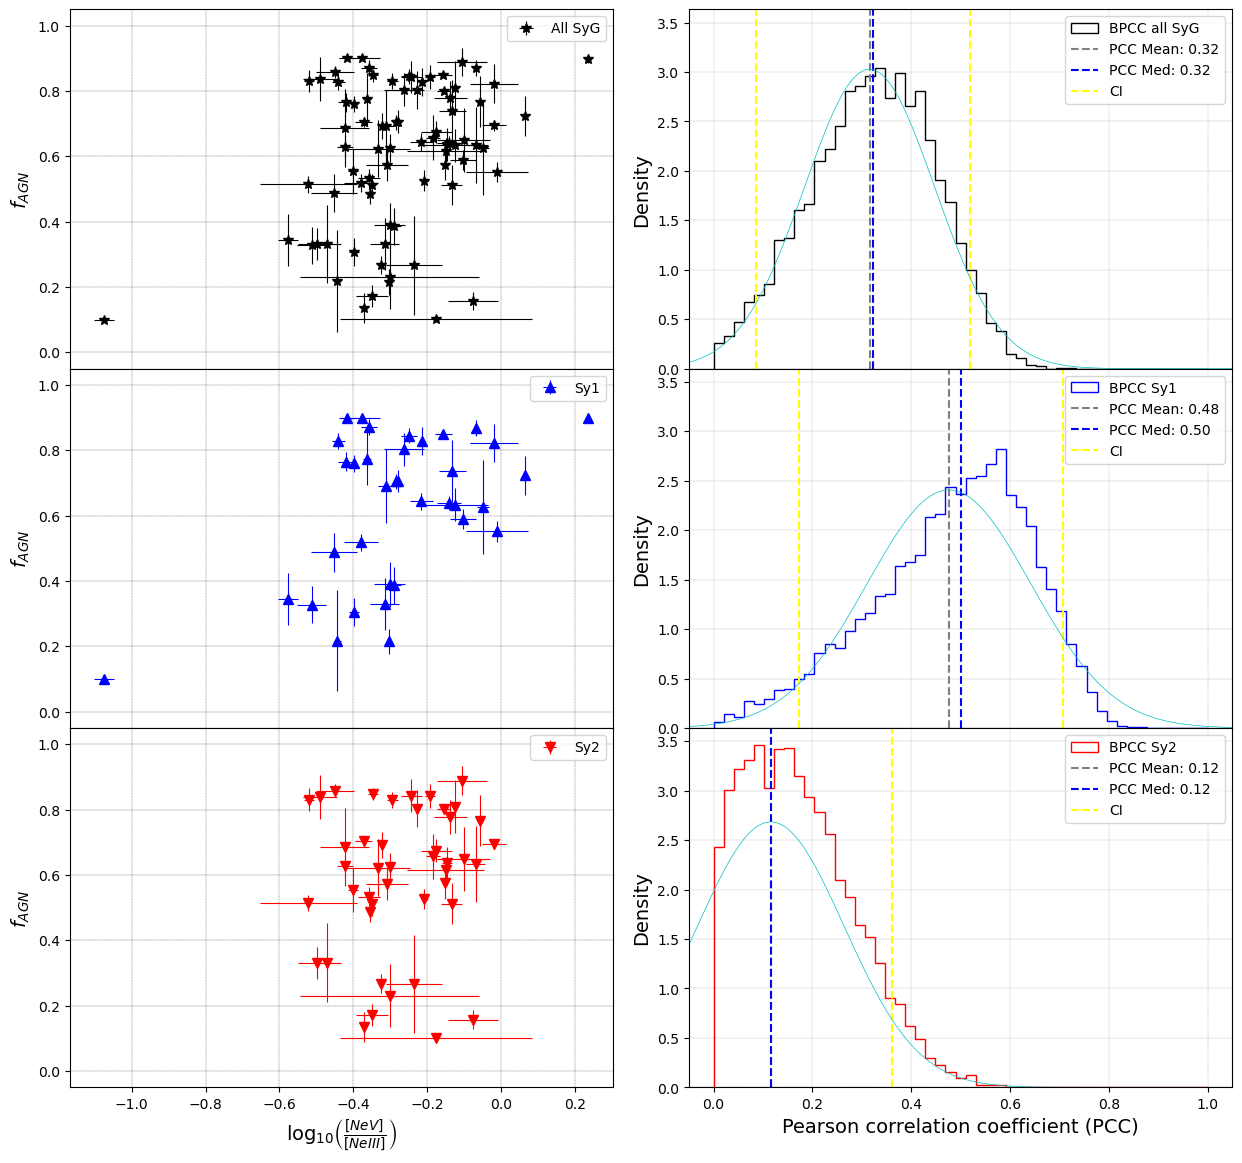

In [37]:
plt.figure(figsize=(15,14))
#plt.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeIII]}$', fontsize=16)
ax1 = plt.subplot(321)
ax1.errorbar(NeVNeIII_Sy['log_[NeV]/[NeIII]'], NeVNeIII_Sy['bayes.agn.fracAGN'],NeVNeIII_Sy['bayes.agn.fracAGN_err'], NeVNeIII_Sy['log_[NeV]/[NeIII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All SyG')
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_ylim(-0.05,1.05)
ax1.legend()
ax1.grid(color='k', linestyle='--', linewidth=0.2)

ax2 = plt.subplot(323,sharex=ax1,sharey=ax1)
ax2.errorbar(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], NeVNeIII_Sy1['bayes.agn.fracAGN'],NeVNeIII_Sy1['bayes.agn.fracAGN_err'], NeVNeIII_Sy1['log_[NeV]/[NeIII]_err'],
             markersize=7,elinewidth=0.8,fmt='b^',label='Sy1')
ax2.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax2.legend()
ax2.grid(color='k', linestyle='--', linewidth=0.2)

ax3 = plt.subplot(325,sharex=ax1,sharey=ax1)
ax3.errorbar(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],NeVNeIII_Sy2['bayes.agn.fracAGN_err'], NeVNeIII_Sy2['log_[NeV]/[NeIII]_err'],
             markersize=7,elinewidth=0.8,fmt='rv',label='Sy2')
ax3.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
ax3.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax3.legend()
ax3.grid(color='k', linestyle='--', linewidth=0.2)

bins = np.linspace(0,1,50)

ax4 = plt.subplot(322)
ax4.hist(NeVNeIII_fracAGN_Sy[0],bins=bins,density=True,color='k',histtype='step',label='BPCC all SyG')
ax4.axvline(x=NeVNeIII_fracAGN_Sy[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeIII_fracAGN_Sy[1])
ax4.axvline(x=NeVNeIII_fracAGN_Sy[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeIII_fracAGN_Sy[3])
ax4.axvline(x=NeVNeIII_fracAGN_Sy[4],ls='--',color='yellow',label='CI')
ax4.axvline(x=NeVNeIII_fracAGN_Sy[5],ls='--',color='yellow')
ax4.set_ylabel('Density',fontsize=14)
ax4.legend()
ax4.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax4.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeIII_fracAGN_Sy[1], NeVNeIII_fracAGN_Sy[2])
ax4.plot(x, p, 'c', linewidth=0.5)

ax5 = plt.subplot(324,sharex=ax4,sharey=ax4)
ax5.hist(NeVNeIII_fracAGN_Sy1[0],bins=bins,density=True,color='b',histtype='step',label='BPCC Sy1')
ax5.axvline(x=NeVNeIII_fracAGN_Sy1[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeIII_fracAGN_Sy1[1])
ax5.axvline(x=NeVNeIII_fracAGN_Sy1[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeIII_fracAGN_Sy1[3])
ax5.axvline(x=NeVNeIII_fracAGN_Sy1[4],ls='--',color='yellow',label='CI')
ax5.axvline(x=NeVNeIII_fracAGN_Sy1[5],ls='--',color='yellow')
ax5.set_ylabel('Density',fontsize=14)
ax5.legend()
ax5.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax5.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeIII_fracAGN_Sy1[1], NeVNeIII_fracAGN_Sy1[2])
ax5.plot(x, p, 'c', linewidth=0.5)

ax6 = plt.subplot(326,sharex=ax4,sharey=ax4)
ax6.hist(NeVNeIII_fracAGN_Sy2[0],bins=bins,density=True,color='r',histtype='step',label='BPCC Sy2')
ax6.axvline(x=NeVNeIII_fracAGN_Sy2[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeVNeIII_fracAGN_Sy2[1])
ax6.axvline(x=NeVNeIII_fracAGN_Sy2[3],ls='--',color='blue',label='PCC Med: %.2f' %NeVNeIII_fracAGN_Sy2[3])
ax6.axvline(x=NeVNeIII_fracAGN_Sy2[4],ls='--',color='yellow',label='CI')
ax6.axvline(x=NeVNeIII_fracAGN_Sy2[5],ls='--',color='yellow')
ax6.set_xlabel(r'Pearson correlation coefficient (PCC)',fontsize=14)
ax6.set_ylabel('Density',fontsize=14)
ax6.legend()
ax6.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax6.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeVNeIII_fracAGN_Sy2[1], NeVNeIII_fracAGN_Sy2[2])
ax6.plot(x, p, 'c', linewidth=0.5)

plt.subplots_adjust(hspace=0.0,wspace=0.14) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## [NeV]/[NeIII] vs other variables (outputs from CIGALE)

In [38]:
NeVNeIII_corr_SFR_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.sfh.sfr'])

NeVNeIII_corr_m_star_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeIII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeIII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:')
print('Total Sample: ',NeVNeIII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeIII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:
Total Sample:  0.13692390810612748
Seyfert 1:  0.11909150884527019
Seyfert 2:  0.19114565421232524

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:
Total Sample:  0.16452100472139064
Seyfert 1:  0.17502263968013682
Seyfert 2:  0.16678596785220792


----------------------------------

# [NeIII]/[NeII]

In [39]:
print('From the', len(NeIIINeII_Sy),'galaxies with [NeIII]/[NeII] info:')
print(len(NeIIINeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeIIINeII_Sy2),'galaxies are Seyfert 2,')

From the 83 galaxies with [NeIII]/[NeII] info:
40 galaxies are Seyfert 1,
43 galaxies are Seyfert 2,


## Histogram

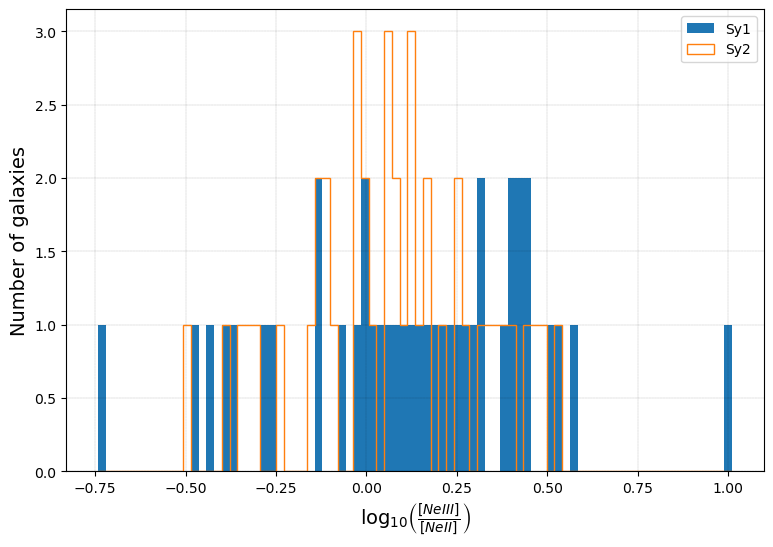

In [40]:
bins_NeIIINeII_Sy = np.linspace(min(NeIIINeII_Sy['log_[NeIII]/[NeII]']),max(NeIIINeII_Sy['log_[NeIII]/[NeII]']),len(NeIIINeII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, label='Sy1')
plt.hist(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeIIINeII_SyG['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## [NeIII]/[NeII] vs AGN Fraction

### Correlation Coefficients:

In [41]:
NeIIINeII_corr_fracAGN_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeIIINeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeIIINeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:
Total Sample:  0.47104560463652856
Seyfert 1:  0.5221240090117947
Seyfert 2:  0.40435529414965193


In [42]:
NeIIINeII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 66 of 83
Number of samples: 10000
Median: 0.47387940705909265
Mean: 0.46901086206310794
Variance: 0.008399842685744854
Standard Desviation: 0.09165065567547706
90 % confidence interval: 0.3098067979837322 - 0.6103152265373097


In [43]:
NeIIINeII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy1,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 32 of 40
Number of samples: 10000
Median: 0.5293427958541911
Mean: 0.5157329106803815
Variance: 0.015243837743570257
Standard Desviation: 0.12346593758429998
90 % confidence interval: 0.29196432800723454 - 0.69450860816675


In [44]:
NeIIINeII_fracAGN_Sy2 = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy2,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 43
Number of samples: 10000
Median: 0.4084488796186997
Mean: 0.3984253815282693
Variance: 0.022666101101949415
Standard Desviation: 0.15055265225810344
90 % confidence interval: 0.13533153695224767 - 0.6304855905801352


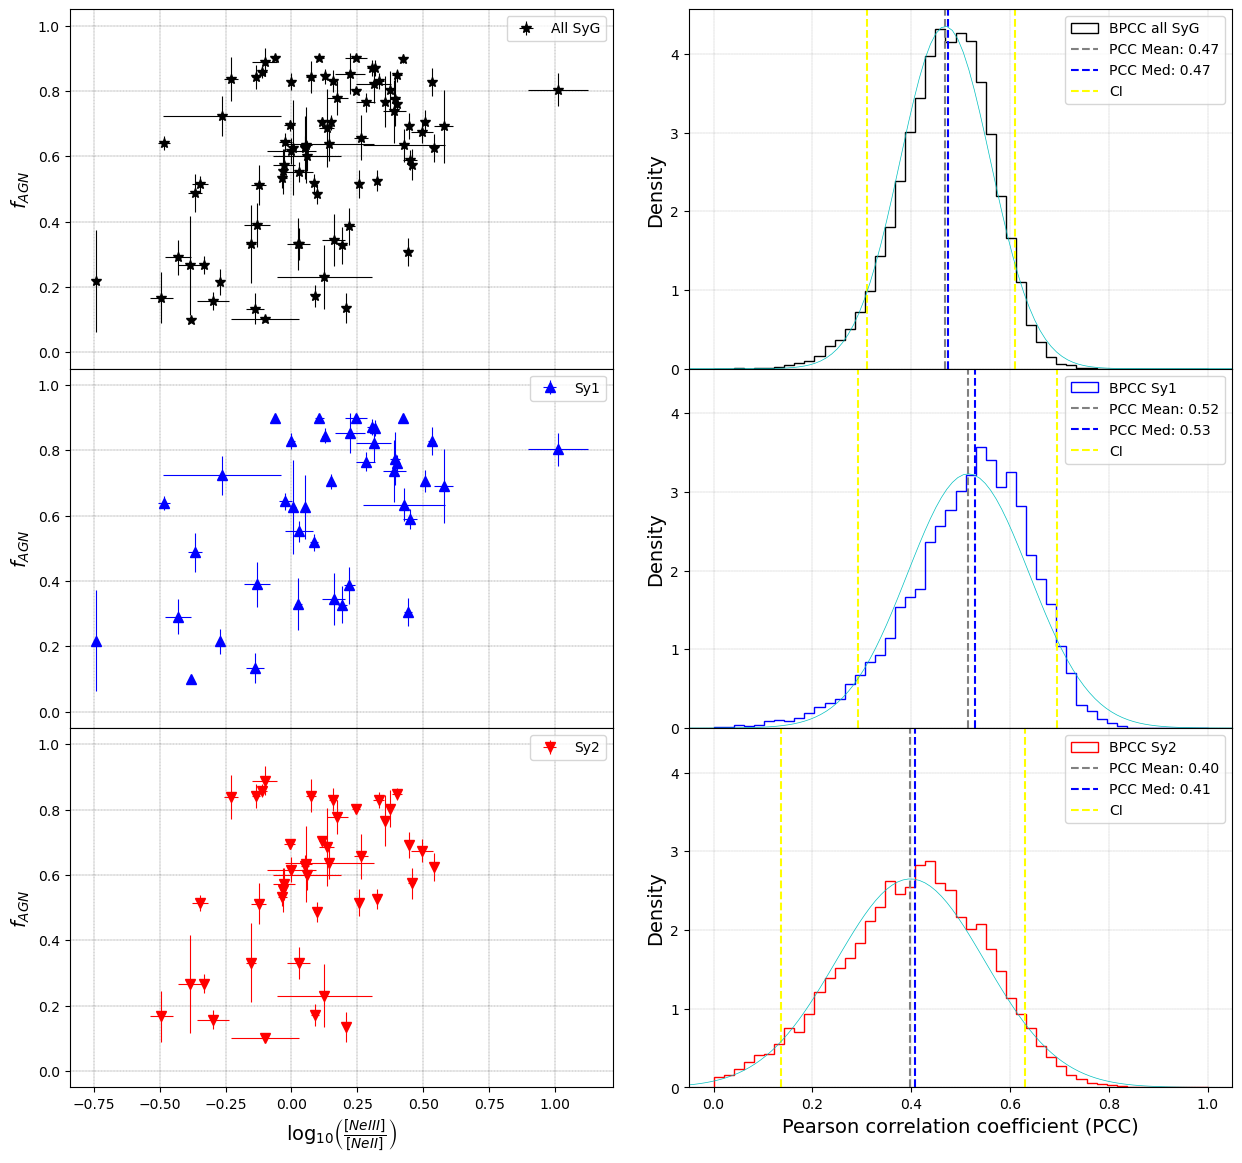

In [45]:
plt.figure(figsize=(15,14))
#plt.suptitle(r'$f_{AGN}$ vs $\frac{[NeIII]}{[NeII]}$', fontsize=16)
ax1 = plt.subplot(321)
ax1.errorbar(NeIIINeII_Sy['log_[NeIII]/[NeII]'], NeIIINeII_Sy['bayes.agn.fracAGN'],NeIIINeII_Sy['bayes.agn.fracAGN_err'], NeIIINeII_Sy['log_[NeIII]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='k*',label='All SyG')
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_ylim(-0.05,1.05)
ax1.legend()
ax1.grid(color='k', linestyle='--', linewidth=0.2)

ax2 = plt.subplot(323,sharex=ax1,sharey=ax1)
ax2.errorbar(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], NeIIINeII_Sy1['bayes.agn.fracAGN'],NeIIINeII_Sy1['bayes.agn.fracAGN_err'], NeIIINeII_Sy1['log_[NeIII]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='b^',label='Sy1')
ax2.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax2.legend()
ax2.grid(color='k', linestyle='--', linewidth=0.2)

ax3 = plt.subplot(325,sharex=ax1,sharey=ax1)
ax3.errorbar(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],NeIIINeII_Sy2['bayes.agn.fracAGN_err'], NeIIINeII_Sy2['log_[NeIII]/[NeII]_err'],
             markersize=7,elinewidth=0.8,fmt='rv',label='Sy2')
ax3.set_xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
ax3.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax3.legend()
ax3.grid(color='k', linestyle='--', linewidth=0.2)

bins = np.linspace(0,1,50)

ax4 = plt.subplot(322)
ax4.hist(NeIIINeII_fracAGN_Sy[0],bins=bins,density=True,color='k',histtype='step',label='BPCC all SyG')
ax4.axvline(x=NeIIINeII_fracAGN_Sy[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeIIINeII_fracAGN_Sy[1])
ax4.axvline(x=NeIIINeII_fracAGN_Sy[3],ls='--',color='blue',label='PCC Med: %.2f' %NeIIINeII_fracAGN_Sy[3])
ax4.axvline(x=NeIIINeII_fracAGN_Sy[4],ls='--',color='yellow',label='CI')
ax4.axvline(x=NeIIINeII_fracAGN_Sy[5],ls='--',color='yellow')
ax4.set_ylabel('Density',fontsize=14)
ax4.legend()
ax4.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax4.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeIIINeII_fracAGN_Sy[1], NeIIINeII_fracAGN_Sy[2])
ax4.plot(x, p, 'c', linewidth=0.5)

ax5 = plt.subplot(324,sharex=ax4,sharey=ax4)
ax5.hist(NeIIINeII_fracAGN_Sy1[0],bins=bins,density=True,color='b',histtype='step',label='BPCC Sy1')
ax5.axvline(x=NeIIINeII_fracAGN_Sy1[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeIIINeII_fracAGN_Sy1[1])
ax5.axvline(x=NeIIINeII_fracAGN_Sy1[3],ls='--',color='blue',label='PCC Med: %.2f' %NeIIINeII_fracAGN_Sy1[3])
ax5.axvline(x=NeIIINeII_fracAGN_Sy1[4],ls='--',color='yellow',label='CI')
ax5.axvline(x=NeIIINeII_fracAGN_Sy1[5],ls='--',color='yellow')
ax5.set_ylabel('Density',fontsize=14)
ax5.legend()
ax5.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax5.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeIIINeII_fracAGN_Sy1[1], NeIIINeII_fracAGN_Sy1[2])
ax5.plot(x, p, 'c', linewidth=0.5)

ax6 = plt.subplot(326,sharex=ax4,sharey=ax4)
ax6.hist(NeIIINeII_fracAGN_Sy2[0],bins=bins,density=True,color='r',histtype='step',label='BPCC Sy2')
ax6.axvline(x=NeIIINeII_fracAGN_Sy2[1],ls='--',color='gray',label='PCC Mean: %.2f' %NeIIINeII_fracAGN_Sy2[1])
ax6.axvline(x=NeIIINeII_fracAGN_Sy2[3],ls='--',color='blue',label='PCC Med: %.2f' %NeIIINeII_fracAGN_Sy2[3])
ax6.axvline(x=NeIIINeII_fracAGN_Sy2[4],ls='--',color='yellow',label='CI')
ax6.axvline(x=NeIIINeII_fracAGN_Sy2[5],ls='--',color='yellow')
ax6.set_xlabel(r'Pearson correlation coefficient (PCC)',fontsize=14)
ax6.set_ylabel('Density',fontsize=14)
ax6.legend()
ax6.grid(color='k', linestyle='--', linewidth=0.1)
xmin, xmax = ax6.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, NeIIINeII_fracAGN_Sy2[1], NeIIINeII_fracAGN_Sy2[2])
ax6.plot(x, p, 'c', linewidth=0.5)

plt.subplots_adjust(hspace=0.0,wspace=0.14) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## [NeIII]/[NeII] vs other variables (outputs from CIGALE)

In [46]:
NeIIINeII_corr_SFR_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.sfh.sfr'])

NeIIINeII_corr_m_star_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeIIINeII_corr_SFR_Sy)
print('Seyfert 1: ',NeIIINeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeIIINeII_corr_m_star_Sy)
print('Seyfert 1: ',NeIIINeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:
Total Sample:  -0.08315321048588233
Seyfert 1:  0.008154627162793414
Seyfert 2:  -0.25891809017066697

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:
Total Sample:  0.08700739945450907
Seyfert 1:  0.2905797350759824
Seyfert 2:  -0.26544656297084085


--------------------------

## Galaxies according to their viewing angle (i from CIGALE)

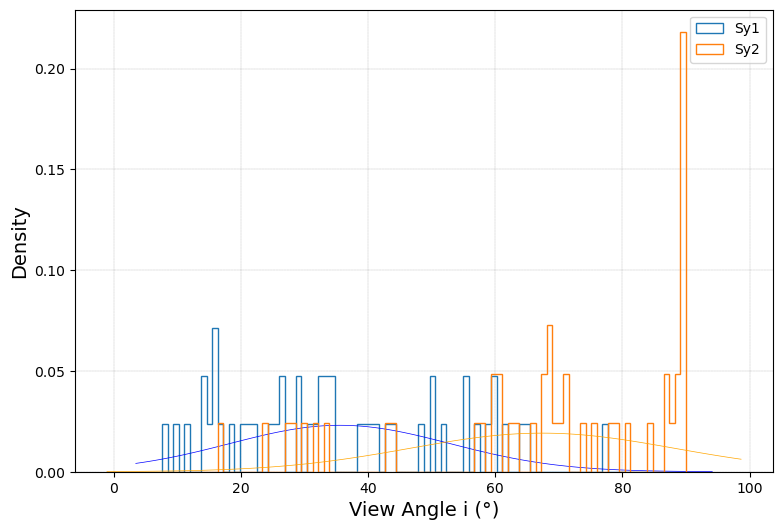

In [47]:
i_Sy1 = Ne_Sy1['bayes.agn.i']
i_Sy2 = Ne_Sy2['bayes.agn.i']
i_SyG = Ne_SyG['bayes.agn.i']
bins_Sy = np.linspace(min(Ne_Sy['bayes.agn.i']),max(Ne_Sy['bayes.agn.i']),len(Ne_Sy))
plt.figure(figsize=(9,6))
plt.hist(i_Sy1, bins=bins_Sy, density=True, histtype='step', label='Sy1')
# Plot the PDF.
mu1, std1 = norm.fit(i_Sy1)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, 'b', linewidth=0.5)

plt.hist(i_Sy2, bins=bins_Sy, density=True, histtype='step', label='Sy2')
# Plot the PDF.
mu2, std2 = norm.fit(i_Sy2)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, 'orange', linewidth=0.5)

plt.xlabel(r'View Angle i (°)',fontsize=14)
plt.ylabel(r'Density',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_view_angle.jpg')

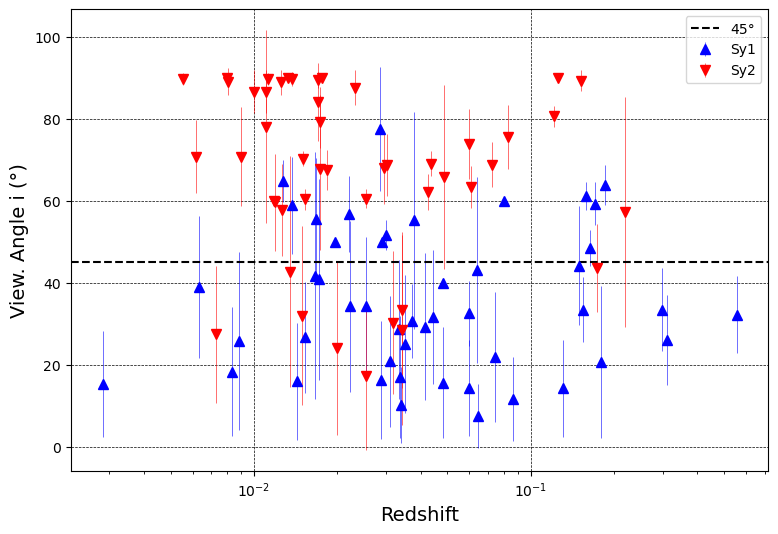

In [48]:
plt.figure(figsize=(9,6))
plt.errorbar(Ne_Sy1['redshift'],Ne_Sy1['bayes.agn.i'],Ne_Sy1['bayes.agn.i_err'],markersize=7,elinewidth=0.4,fmt='b^',label='Sy1')
plt.errorbar(Ne_Sy2['redshift'],Ne_Sy2['bayes.agn.i'],Ne_Sy2['bayes.agn.i_err'],markersize=7,elinewidth=0.4,fmt='rv',label='Sy2')
plt.axhline(y=45,ls='--',color='black', label='45°')
plt.xlabel(r'Redshift',fontsize=14)
plt.xscale('log')
plt.ylabel(r'View. Angle i (°)',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'view_angle_vs_redshift.jpg')

### Classifying the galaxies by their viewing angle:

In [49]:
AGN_T1 = Ne_Sy[Ne_Sy['bayes.agn.i']<45]
AGN_T2 = Ne_Sy[Ne_Sy['bayes.agn.i']>45]

df_AGN_T1 = AGN_T1.to_pandas()
df_AGN_T2 = AGN_T2.to_pandas()

In [50]:
print('For the',len(AGN_T1),'galaxies with i<45°,',len(AGN_T1[AGN_T1['otype']=='Sy1']),'are Seyfert 1 and',\
     len(AGN_T1[AGN_T1['otype']=='Sy2']),'are Seyfert 2')

print('For the',len(AGN_T2),'galaxies with i>45°,',len(AGN_T2[AGN_T2['otype']=='Sy2']),'are Seyfert 2 and',\
     len(AGN_T2[AGN_T2['otype']=='Sy1']),'are Seyfert 1')

For the 43 galaxies with i<45°, 34 are Seyfert 1 and 9 are Seyfert 2
For the 52 galaxies with i>45°, 38 are Seyfert 2 and 14 are Seyfert 1


### [NeV]/[NeII] vs $f_{AGN}$ by their viewing angle

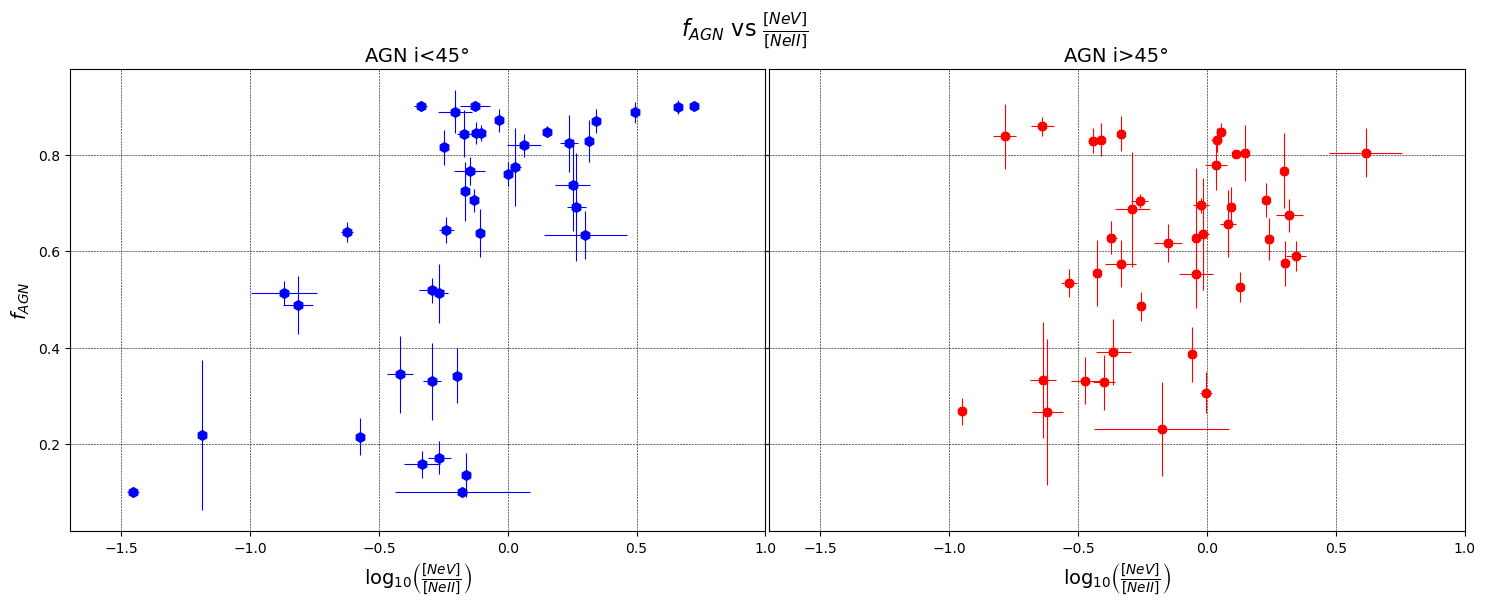

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)

ax1.errorbar(AGN_T1['log_[NeV]/[NeII]'], AGN_T1['bayes.agn.fracAGN'],\
             AGN_T1['bayes.agn.fracAGN_err'], AGN_T1['log_[NeV]/[NeII]_err'],markersize=7,elinewidth=0.8,fmt='bh')
ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title('AGN i<45°', fontsize=14)

ax2.errorbar(AGN_T2['log_[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],\
             AGN_T2['bayes.agn.fracAGN_err'], AGN_T2['log_[NeV]/[NeII]_err'],markersize=7,elinewidth=0.8,fmt='r8')
ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('AGN i>45°', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [52]:
NeVNeII_corr_AGNT1 = df_AGN_T1['log_[NeV]/[NeII]'].corr(df_AGN_T1['bayes.agn.fracAGN'])
NeVNeII_corr_AGNT2 = df_AGN_T2['log_[NeV]/[NeII]'].corr(df_AGN_T2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('AGN i<45°: ',NeVNeII_corr_AGNT1)
print('AGN i>45°: ',NeVNeII_corr_AGNT2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
AGN i<45°:  0.619914940393564
AGN i>45°:  0.3230889388395862


In [53]:
NeVNeII_fracAGN_AGNT1 = BootstrapCorr(10000,0.8,df_AGN_T1,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 43
Number of samples: 10000
Median: 0.6212205771303239
Mean: 0.6158676074400236
Variance: 0.008846069286032397
Standard Desviation: 0.09405354478185496
90 % confidence interval: 0.4525546713090728 - 0.7620538822311032


In [54]:
NeVNeII_fracAGN_AGNT2 = BootstrapCorr(10000,0.8,df_AGN_T2,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 42 of 52
Number of samples: 10000
Median: 0.32571710299498235
Mean: 0.3171958055492025
Variance: 0.0318130075102169
Standard Desviation: 0.17836201252009046
90 % confidence interval: 0.008748264782011789 - 0.5972790734797386


---------------------
## Galaxies according to their AGN disc luminosity $\left(L^{disc}_{AGN} \right)$


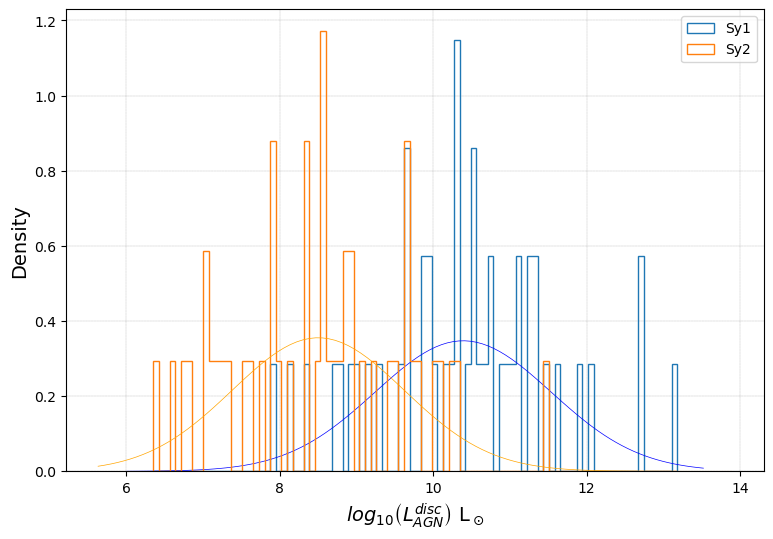

In [55]:
L_Sy1 = Ne_Sy1['log_bayes.agn.disk_luminosity']
L_Sy2 = Ne_Sy2['log_bayes.agn.disk_luminosity']
bins_Sy = np.linspace(min(Ne_Sy['log_bayes.agn.disk_luminosity']),max(Ne_Sy['log_bayes.agn.disk_luminosity']),len(Ne_Sy))
plt.figure(figsize=(9,6))
plt.hist(L_Sy1, bins=bins_Sy, density=True, histtype='step', label='Sy1')
# Plot the PDF.
mu1, std1 = norm.fit(L_Sy1)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, 'b', linewidth=0.5)

plt.hist(L_Sy2, bins=bins_Sy, density=True, histtype='step', label='Sy2')
# Plot the PDF.
mu2, std2 = norm.fit(L_Sy2)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, 'orange', linewidth=0.5)

plt.xlabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
plt.ylabel(r'Density',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_AGN_disc_Lum_Sy.jpg')

### $L^{disc}_{AGN}$ vs Redshift

Ramos et al. (2021) define a separation limit with the median values of the separation between Seyfert type as linear relation:

\begin{equation}
    \log \left(L^{disc}_{AGN} \right) = (9.20 \pm 0.08) + (8.67 \pm 0.61) \times \log(1+z)
\end{equation}

In [56]:
z = np.linspace(min(Ne_Sy['redshift']),max(Ne_Sy['redshift']),len(Ne_Sy))
L = 9.20 + 8.67*np.log10(1+z)
L_u = (9.20-0.08) + (8.67-0.61)*np.log10(1+z)
L_o = (9.20+0.08) + (8.67+0.61)*np.log10(1+z)
len(L)

95

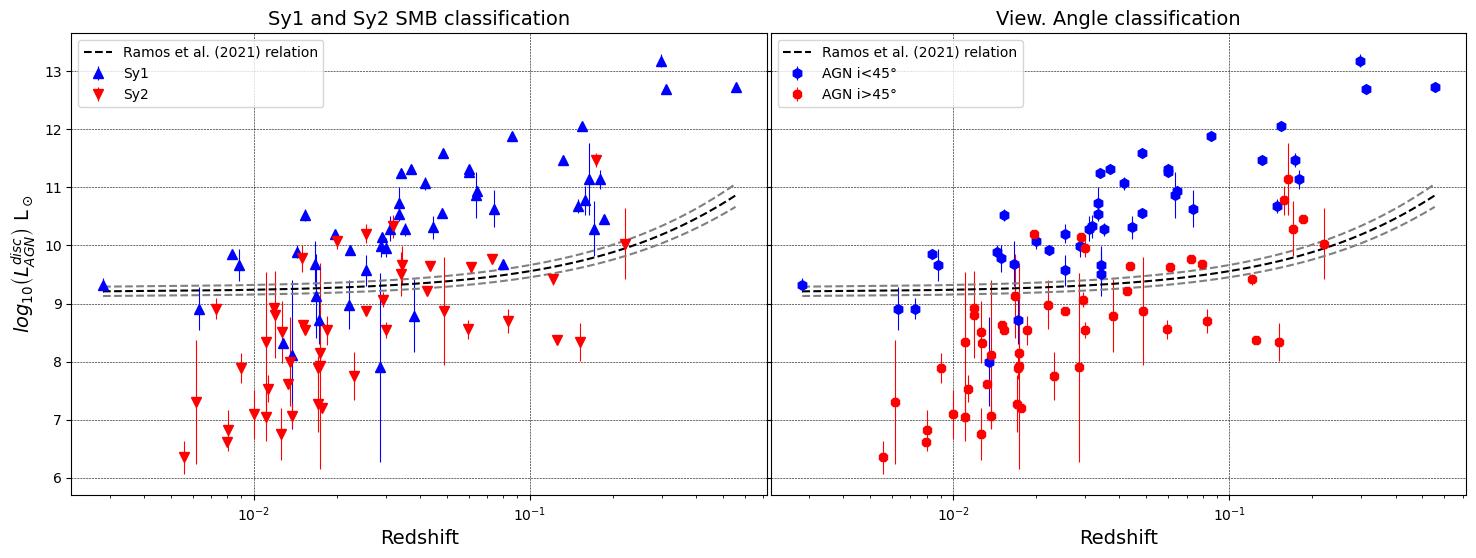

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)

ax1.set_xscale('log')
ax1.errorbar(Ne_Sy1['redshift'],Ne_Sy1['log_bayes.agn.disk_luminosity'],Ne_Sy1['log_bayes.agn.disk_luminosity_err'],markersize=7,elinewidth=0.8,fmt='b^',label='Sy1')
ax1.errorbar(Ne_Sy2['redshift'],Ne_Sy2['log_bayes.agn.disk_luminosity'],Ne_Sy2['log_bayes.agn.disk_luminosity_err'],markersize=7,elinewidth=0.8,fmt='rv',label='Sy2')
ax1.plot(z,L,ls='--',color='black',label='Ramos et al. (2021) relation')
ax1.plot(z,L_u,ls='--',color='gray')
ax1.plot(z,L_o,ls='--',color='gray')
ax1.set_xlabel(r'Redshift',fontsize=14)
ax1.set_ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
ax1.set_title('Sy1 and Sy2 SMB classification', fontsize=14)
ax1.legend()

ax2.set_xscale('log')
ax2.errorbar(AGN_T1['redshift'],AGN_T1['log_bayes.agn.disk_luminosity'],AGN_T1['log_bayes.agn.disk_luminosity_err'],markersize=7,elinewidth=0.8,fmt='bh',label='AGN i<45°')
ax2.errorbar(AGN_T2['redshift'],AGN_T2['log_bayes.agn.disk_luminosity'],AGN_T2['log_bayes.agn.disk_luminosity_err'],markersize=7,elinewidth=0.8,fmt='r8',label='AGN i>45°')
ax2.plot(z,L,ls='--',color='black',label='Ramos et al. (2021) relation')
ax2.plot(z,L_u,ls='--',color='gray')
ax2.plot(z,L_o,ls='--',color='gray')
ax2.set_xlabel(r'Redshift',fontsize=14)
ax2.set_title('View. Angle classification', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
ax2.legend()

plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'AGN_disc_L_vs_reshift.jpg')

### Classifying the galaxies by their AGN disc luminosity:

In [58]:
AGN_T1_L = Ne_Sy[Ne_Sy['log_bayes.agn.disk_luminosity'] > 9.20 + 8.67*np.log10(1+Ne_Sy['redshift'])]
AGN_T2_L = Ne_Sy[Ne_Sy['log_bayes.agn.disk_luminosity'] < 9.20 + 8.67*np.log10(1+Ne_Sy['redshift'])]

df_AGN_T1_L = AGN_T1_L.to_pandas()
df_AGN_T2_L = AGN_T2_L.to_pandas()

In [59]:
print('For the',len(AGN_T1_L),'galaxies with their AGN disc luminosity > than the Ramos et al. (2021) luminosity \
relation,',len(AGN_T1_L[AGN_T1_L['otype']=='Sy1']),'\nare Seyfert1 and',len(AGN_T1[AGN_T1['otype']=='Sy2']),\
      'are Seyfert2')

print('For the',len(AGN_T2_L),'galaxies with their AGN disc luminosity < than the Ramos et. al (2021) lumionosity \
relation,',len(AGN_T2_L[AGN_T2_L['otype']=='Sy2']),'\nare Seyfert2 and',len(AGN_T2_L[AGN_T2_L['otype']=='Sy1']),\
      'are Seyfert1')

For the 51 galaxies with their AGN disc luminosity > than the Ramos et al. (2021) luminosity relation, 40 
are Seyfert1 and 9 are Seyfert2
For the 44 galaxies with their AGN disc luminosity < than the Ramos et. al (2021) lumionosity relation, 36 
are Seyfert2 and 8 are Seyfert1


Just to check if we did the classification correctly, we will graph again the $L^{disc}_{AGN}$ vs Redshift:

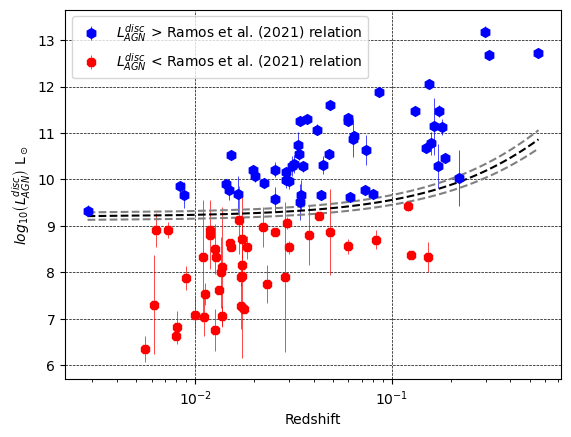

In [60]:
plt.figure()

plt.errorbar(AGN_T1_L['redshift'],AGN_T1_L['log_bayes.agn.disk_luminosity'],AGN_T1_L['log_bayes.agn.disk_luminosity_err'],
             markersize=7,elinewidth=0.5,fmt='bh',label=r'$L^{disc}_{AGN}$ > Ramos et al. (2021) relation')
plt.errorbar(AGN_T2_L['redshift'],AGN_T2_L['log_bayes.agn.disk_luminosity'],AGN_T2_L['log_bayes.agn.disk_luminosity_err'],
             markersize=7,elinewidth=0.5,fmt='r8',label=r'$L^{disc}_{AGN}$ < Ramos et al. (2021) relation')

plt.plot(z,L,ls='--',color='black')
plt.plot(z,L_u,ls='--',color='gray')
plt.plot(z,L_o,ls='--',color='gray')

plt.xlabel(r'Redshift')
plt.xscale('log')
plt.ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()

### [NeV]/[NeII] vs $f_{AGN}$ by their AGN disc luminosity:

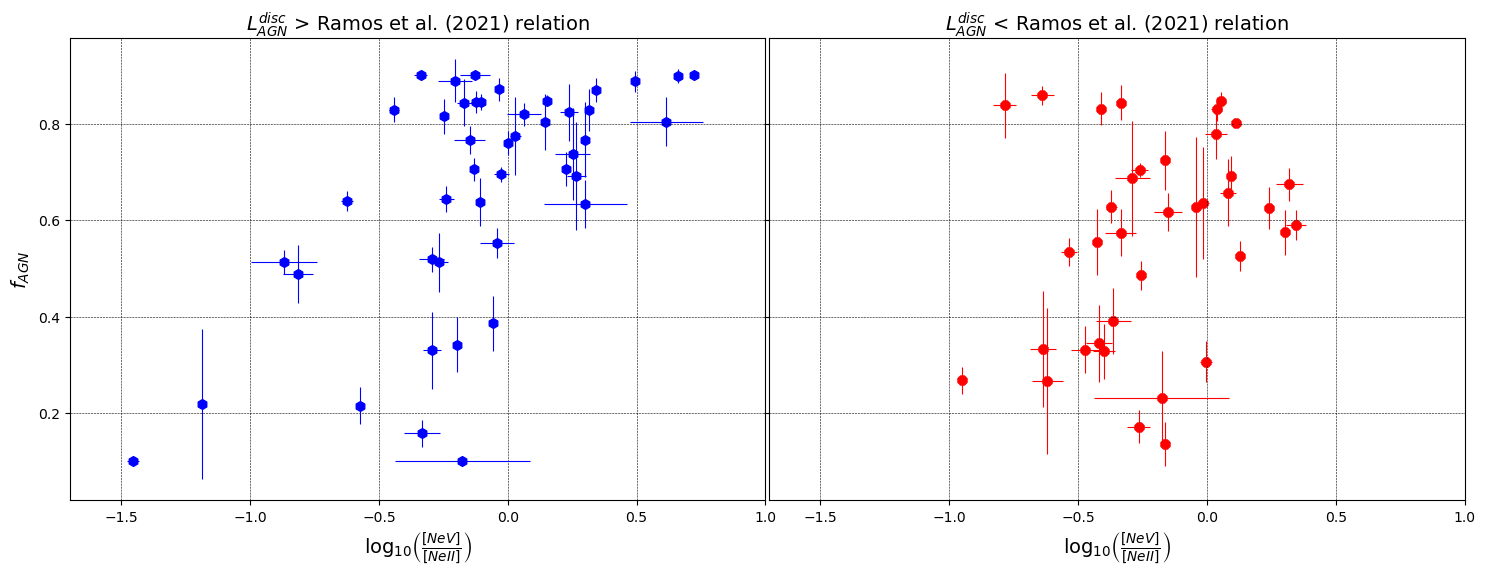

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(AGN_T1_L['log_[NeV]/[NeII]'],AGN_T1_L['bayes.agn.fracAGN'],50,color='blue',marker = 'h')
ax1.errorbar(AGN_T1_L['log_[NeV]/[NeII]'], AGN_T1_L['bayes.agn.fracAGN'],\
             AGN_T1_L['bayes.agn.fracAGN_err'], AGN_T1_L['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title(r'$L^{disc}_{AGN}$ > Ramos et al. (2021) relation', fontsize=14)
ax2.scatter(AGN_T2_L['log_[NeV]/[NeII]'], AGN_T2_L['bayes.agn.fracAGN'],50, color='red', marker = '8')
ax2.errorbar(AGN_T2_L['log_[NeV]/[NeII]'], AGN_T2_L['bayes.agn.fracAGN'],\
             AGN_T2_L['bayes.agn.fracAGN_err'], AGN_T2_L['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title(r'$L^{disc}_{AGN}$ < Ramos et al. (2021) relation', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [62]:
NeVNeII_corr_AGNT1_L = df_AGN_T1_L['log_[NeV]/[NeII]'].corr(df_AGN_T1_L['bayes.agn.fracAGN'])
NeVNeII_corr_AGNT2_L = df_AGN_T2_L['log_[NeV]/[NeII]'].corr(df_AGN_T2_L['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('AGN disc luminosty > Ramos et al. 2021 adjusment: ',NeVNeII_corr_AGNT1_L)
print('AGN disc luminosty < Ramos et al. 2021 adjusment: ',NeVNeII_corr_AGNT2_L)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
AGN disc luminosty > Ramos et al. 2021 adjusment:  0.6273831595206586
AGN disc luminosty < Ramos et al. 2021 adjusment:  0.26208150585004863


In [63]:
NeVNeII_fracAGN_AGNT1_L = BootstrapCorr(10000,0.8,df_AGN_T1_L,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 41 of 51
Number of samples: 10000
Median: 0.6272712276896727
Mean: 0.6173425134089956
Variance: 0.011374814153888883
Standard Desviation: 0.10665277377494166
90 % confidence interval: 0.4249231572030926 - 0.7730184626279794


In [64]:
NeVNeII_fracAGN_AGNT2_L = BootstrapCorr(10000,0.8,df_AGN_T2_L,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 35 of 44
Number of samples: 10000
Median: 0.2678698048469029
Mean: 0.26338769540275725
Variance: 0.03063512387731147
Standard Desviation: 0.17502892297363734
90 % confidence interval: -0.03545010169199455 - 0.5442119655318902


--------------------------

## $L^{disc}_{AGN}$ vs $i$

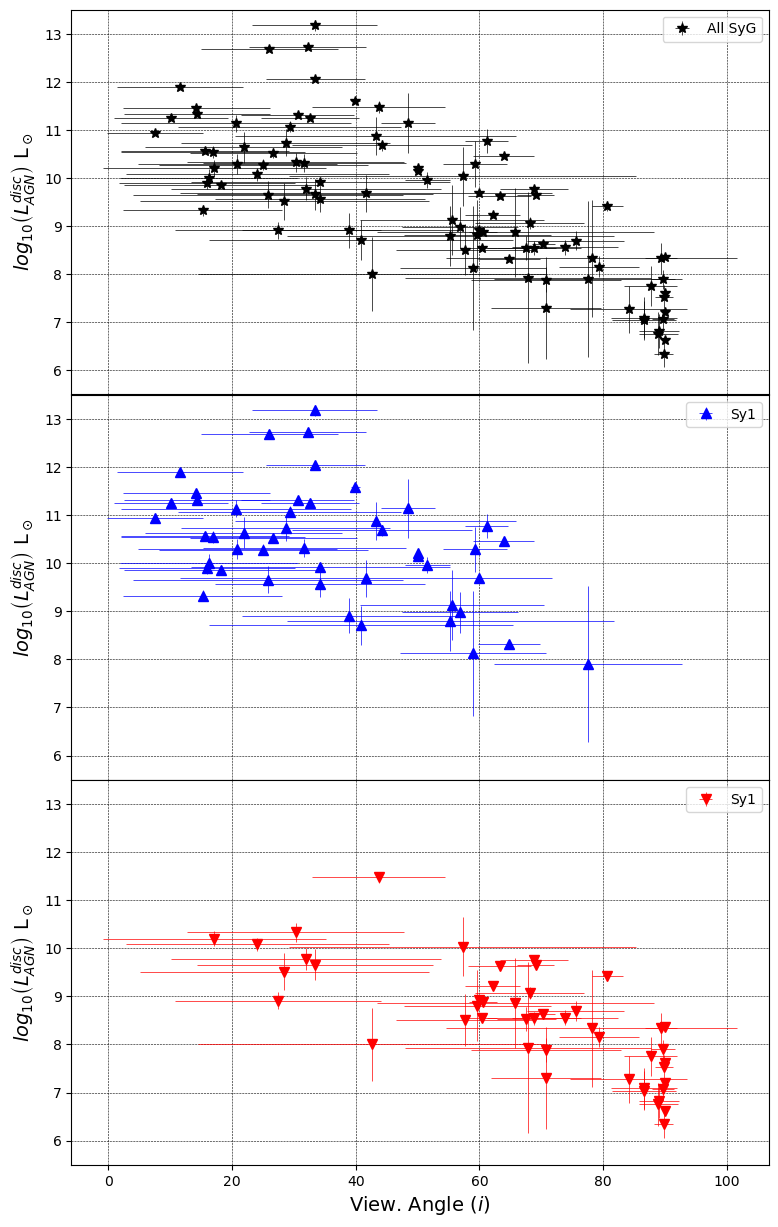

In [65]:
fig, (ax1, ax2, ax3,) = plt.subplots(3,1,figsize=(9,15),sharex=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)

ax1.errorbar(Ne_Sy['bayes.agn.i'], Ne_Sy['log_bayes.agn.disk_luminosity'],Ne_Sy['log_bayes.agn.disk_luminosity_err'], Ne_Sy['bayes.agn.i_err'],
             markersize=7,elinewidth=0.5,fmt='k*',label='All SyG')
ax1.set_ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$', fontsize=14)
ax1.set_ylim(5.5,13.5)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax1.legend()

ax2.errorbar(Ne_Sy1['bayes.agn.i'], Ne_Sy1['log_bayes.agn.disk_luminosity'],Ne_Sy1['log_bayes.agn.disk_luminosity_err'], Ne_Sy1['bayes.agn.i_err'],
             markersize=7,elinewidth=0.5,fmt='b^',label='Sy1')
ax2.set_ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$', fontsize=14)
ax2.set_ylim(5.5,13.5)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
ax2.legend()

ax3.errorbar(Ne_Sy2['bayes.agn.i'], Ne_Sy2['log_bayes.agn.disk_luminosity'],Ne_Sy2['log_bayes.agn.disk_luminosity_err'], Ne_Sy2['bayes.agn.i_err'],
             markersize=7,elinewidth=0.5,fmt='rv',label='Sy1')
ax3.set_ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$', fontsize=14)
ax3.set_xlabel(r'View. Angle ($i$)', fontsize=14)
ax3.set_ylim(5.5,13.5)
ax3.grid(color='k', linestyle='--', linewidth=0.4)
ax3.legend()

plt.subplots_adjust(hspace=0.001) #Space between subplots

Bootstraps results for the correlation coefficient between bayes.agn.i y log_bayes.agn.disk_luminosity :
Samples lenght: 76 of 95
Number of samples: 10000
Median: -0.7766375228326201
Mean: -0.7747073062394206
Variance: 0.0015115785633116705
Standard Desviation: 0.038879024721714284
90 % confidence interval: -0.8345071771190055 - -0.7072624131400322


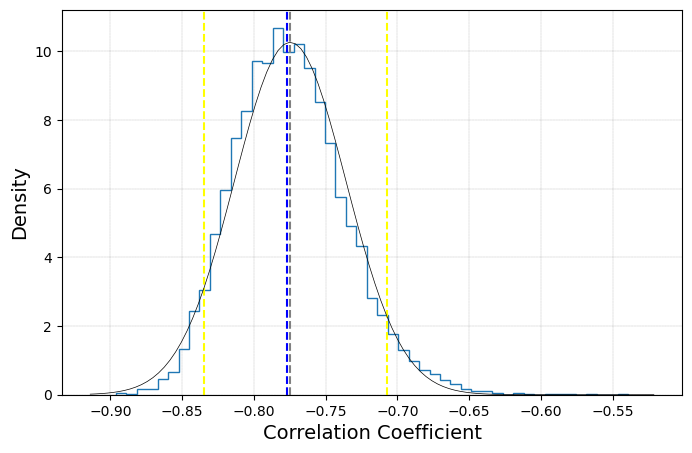

In [66]:
LAGNdisc_i_Sy = BootstrapCorr(10000,0.8,df_Ne_Sy,'bayes.agn.i','log_bayes.agn.disk_luminosity',histo=True)

---------------------------

## Skymap

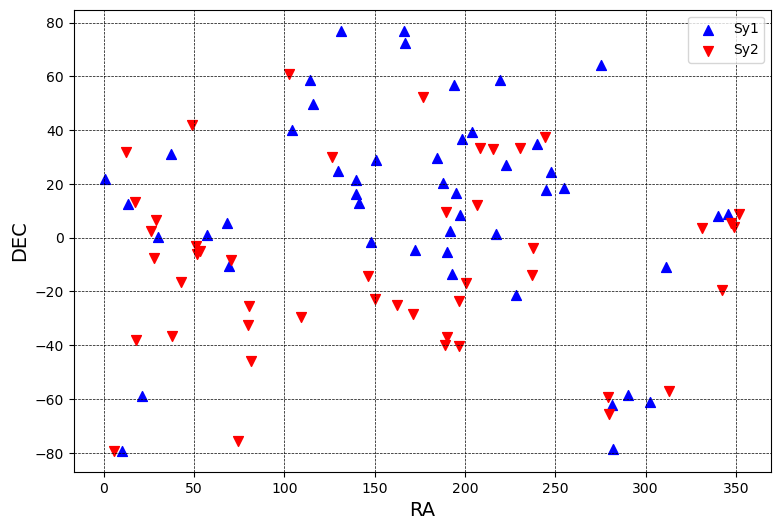

In [67]:
plt.figure(figsize=(9,6))
plt.scatter(Ne_Sy1['RA'], Ne_Sy1['DEC'],50,color='blue', marker = '^', label='Sy1')
plt.scatter(Ne_Sy2['RA'], Ne_Sy2['DEC'],50,color='red', marker = 'v', label='Sy2')
plt.xlabel(r'RA', fontsize=14)
plt.ylabel(r'DEC', fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

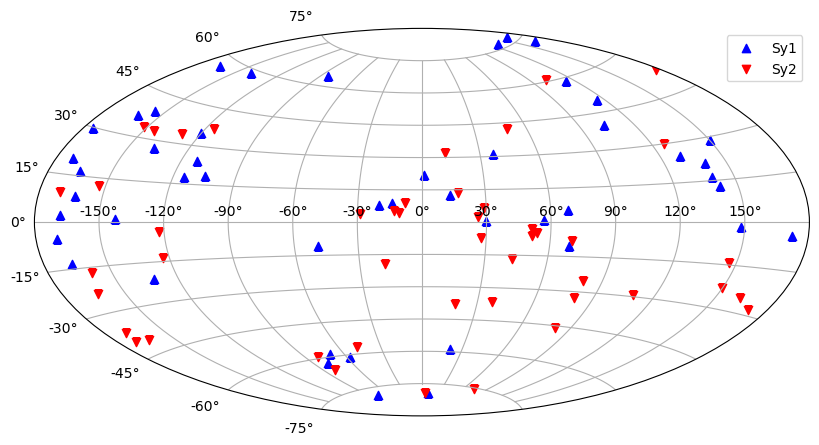

In [68]:
coordinates_Sy1= SkyCoord(ra=Ne_Sy1['RA'], dec=Ne_Sy1['DEC'],unit='deg',frame='icrs')
coordinates_Sy2= SkyCoord(ra=Ne_Sy2['RA'], dec=Ne_Sy2['DEC'],unit='deg',frame='icrs')

plt.figure(figsize=(10,7))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(coordinates_Sy1.ra.wrap_at('180d').radian, coordinates_Sy1.dec.radian,\
            color='blue', marker = '^', label='Sy1')
plt.scatter(coordinates_Sy2.ra.wrap_at('180d').radian, coordinates_Sy2.dec.radian,\
            color='red', marker = 'v', label='Sy2')
plt.legend()
plt.show()

## Redshift Distribution

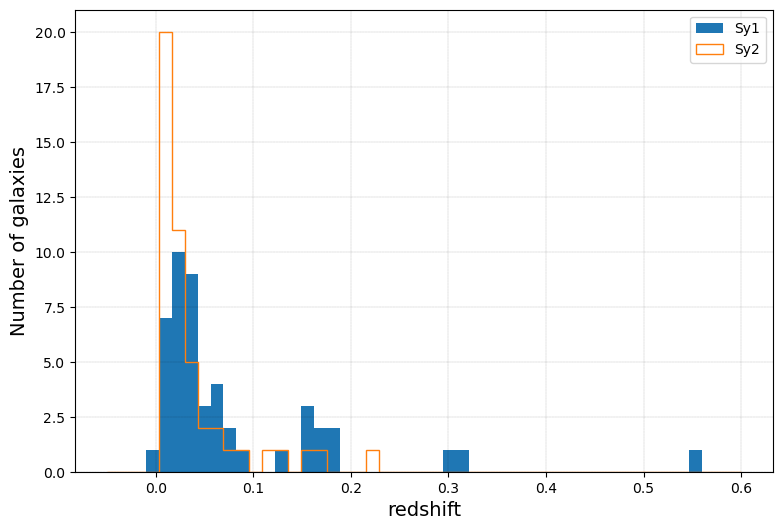

In [69]:
z_Sy1 = Ne_Sy1['redshift']
z_Sy2 = Ne_Sy2['redshift']
#z_SyG = Ne_SyG['redshift']
bins_Sy = np.linspace(-0.05,0.6,50)
plt.figure(figsize=(9,6))
plt.hist(z_Sy1, bins=bins_Sy, label='Sy1')
plt.hist(z_Sy2, bins=bins_Sy, histtype='step', label='Sy2')
plt.xlabel('redshift',fontsize=14)
plt.ylabel(r'Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
#plt.yscale('log')
plt.legend()

In [70]:
print('Min redshift value for Sy1:',min(z_Sy1),'. Max redshift value for Sy1:',max(z_Sy1))
print('Min redshift value for Sy2:',min(z_Sy2),'. Max redshift value for Sy2:',max(z_Sy2))

Min redshift value for Sy1: 0.002838630450136274 . Max redshift value for Sy1: 0.55517
Min redshift value for Sy2: 0.005554 . Max redshift value for Sy2: 0.22


---------------------------
## Alternative graphic for [NeV/NeII] vs AGN Frac:

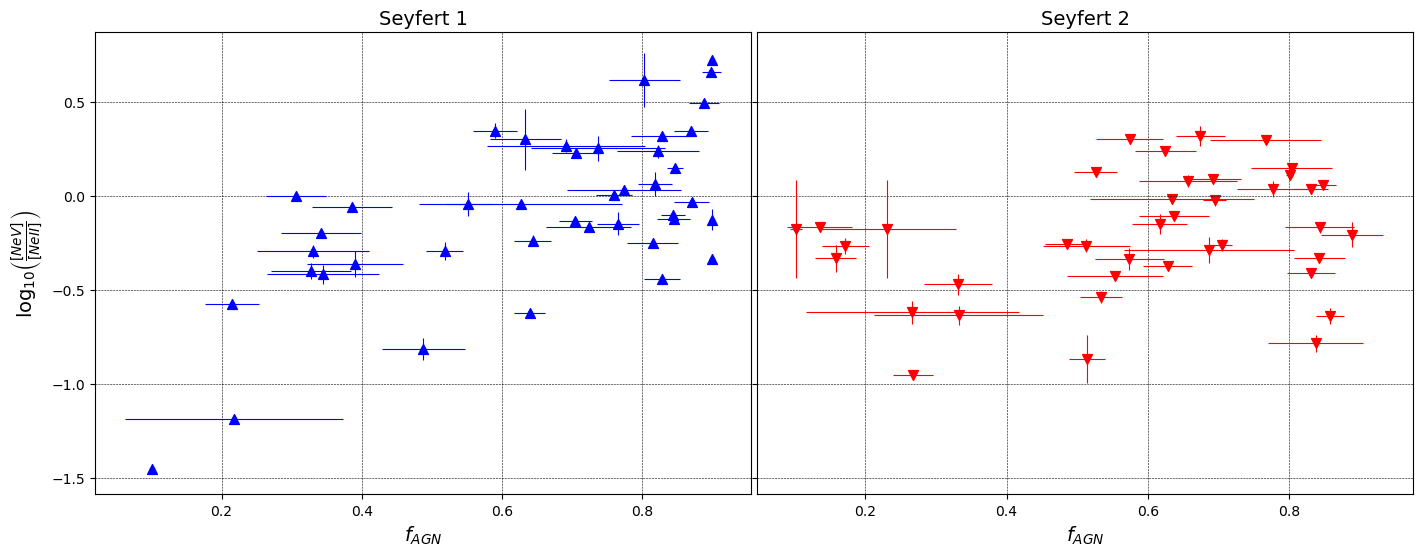

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
#fig.suptitle(r'$\frac{[NeV]}{[NeII]}$ vs $f_{AGN}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['bayes.agn.fracAGN'],NeVNeII_Sy1['log_[NeV]/[NeII]'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['bayes.agn.fracAGN'], NeVNeII_Sy1['log_[NeV]/[NeII]'],\
             NeVNeII_Sy1['log_[NeV]/[NeII]_err'], NeVNeII_Sy1['bayes.agn.fracAGN_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlabel(r'$f_{AGN}$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'], \
             NeVNeII_Sy2['log_[NeV]/[NeII]_err'], NeVNeII_Sy2['bayes.agn.fracAGN_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlabel(r'$f_{AGN}$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

---------------------------------------

## Final numbers

In [72]:
date_sample = 'Sep_02_2022'
simbad_sample_Sy = Table.read(path_raw+'SMB_'+date_sample+'_Sy_Samples'+'.vot',format='votable') 
NeIR_Sy = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
CIG_BadGalaxies = Table.read('../Datos/Complementary/CIGPhot_BadEnergyBalance.tbl', format='ascii')
CIG = Table.read(path_FINAL+'CIGPhot_EnergyBal_All.tbl', format='ascii')
out0to90 = Table.read(path_CIGALE_out+'results0a90_All.fits', format='fits')

In [73]:
print('From the',len(simbad_sample_Sy),'Seyfert Galaxies from the SIMBAD sample,',len(NeIR_Sy),'have information\n\
of Neon lines ([NeII],[NeIII] or [NeV]).\n') 

print('After remove',len(CIG_BadGalaxies),'galaxies with bad energy balance coverage, the total of galaxies \n\
to model and fit their SEDs in CIGALE was',len(CIG),'.\n')

print(r'Cleaining the',len(CIG),'galaxies from CIGALE results of the galaxies with bad fittings \n\
and a bad constrained SFR (\'pcigale.ini\' setup i = 0 to 90),',len(CIG)-len(out0to90),'galaxies \n\
was removed leaving a total of',len(out0to90),'galaxies\n')

print('Of this',len(out0to90),'galaxies, only',len(Ne_Sy),'have information from at least two different \n\
Neon spectral lines with the same bibcodes to calcule the spectral line ratios\n')

print('From the', len(Ne_Sy),'galaxies:',len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info and',len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 44270 Seyfert Galaxies from the SIMBAD sample, 303 have information
of Neon lines ([NeII],[NeIII] or [NeV]).

After remove 51 galaxies with bad energy balance coverage, the total of galaxies 
to model and fit their SEDs in CIGALE was 252 .

Cleaining the 252 galaxies from CIGALE results of the galaxies with bad fittings 
and a bad constrained SFR ('pcigale.ini' setup i = 0 to 90), 134 galaxies 
was removed leaving a total of 118 galaxies

Of this 118 galaxies, only 95 have information from at least two different 
Neon spectral lines with the same bibcodes to calcule the spectral line ratios

From the 95 galaxies: 82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info and 83 galaxies have [NeIII]/[NeII] info


-------------------------------------
## Notebook Info

In [74]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

matplotlib: 3.5.2
astropy   : 5.1
pandas    : 1.4.4
numpy     : 1.21.5

Watermark: 2.3.1



-----------------------------------------
### Cells for test

0.7197497053892259
0.710337165268005
0.09001084427607309
0.5440245472386708 - 0.8424384269493531


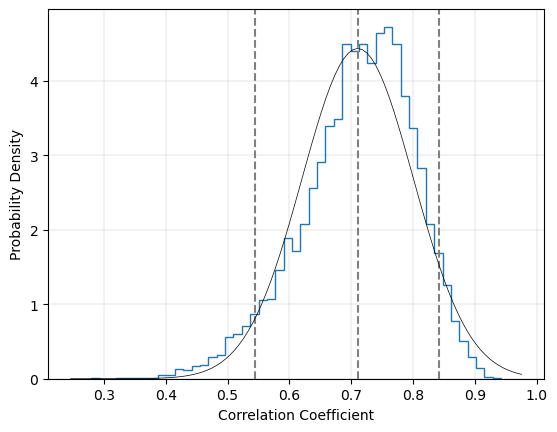

In [75]:
corrdata = []
for i in range(10000):
    sample = df_NeVNeII_Sy2.sample(frac=0.8,replace=True)
    corr = np.log10(sample['redshift']).corr(sample['log_bayes.agn.disk_luminosity'])
    corrdata.append(corr)

mu, std = norm.fit(corrdata)

bins = np.linspace(min(corrdata), max(corrdata),50)
plt.hist(corrdata, bins=bins, density=True, histtype='step')
plt.axvline(x=np.mean(corrdata),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,5),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,95),ls='--',color='gray')
plt.xlabel(r'Correlation Coefficient')
plt.ylabel('Probability Density')
plt.grid(color='k', linestyle='--', linewidth=0.1)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=0.5)

print(np.median(corrdata))
print(mu)
print(std)
print(np.percentile(corrdata,5),'-',np.percentile(corrdata,95))

-------------------------------